# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

# Load Data

In [5]:
import warnings

warnings.filterwarnings('ignore')

# Function to load all participants
df_good = pd.read_csv('../../02_analysis/df_good.csv')

# df = subject_df(df=df_good, sub_num=0)

# Next Day Gap

# Moving Average: Next 3 Days

In [ ]:
# Define a function to calculate the 3-day moving average with forward-looking window
def forward_moving_average(series, window=3):
    return series.rolling(window=window, min_periods=1).mean().shift(-window)

# Apply the moving average calculation for each PID
df_featEng['target'] = df_featEng.groupby('PID')['sr_gap_heuristic'].transform(lambda x: forward_moving_average(x, window=3))

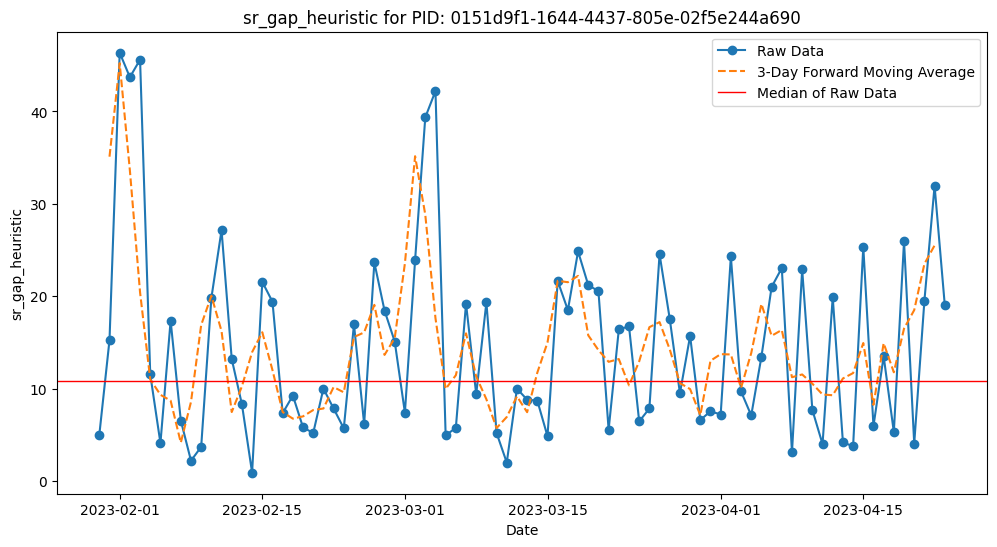

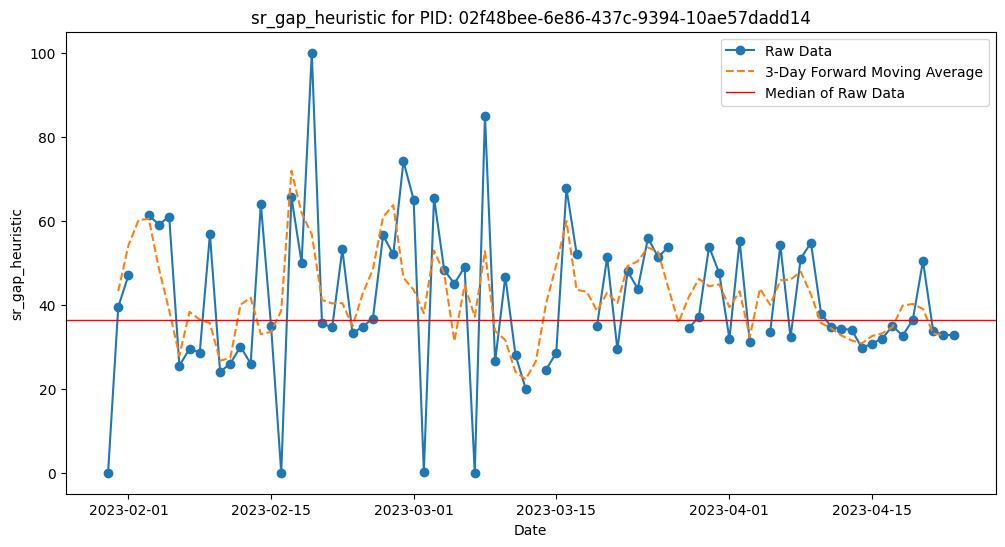

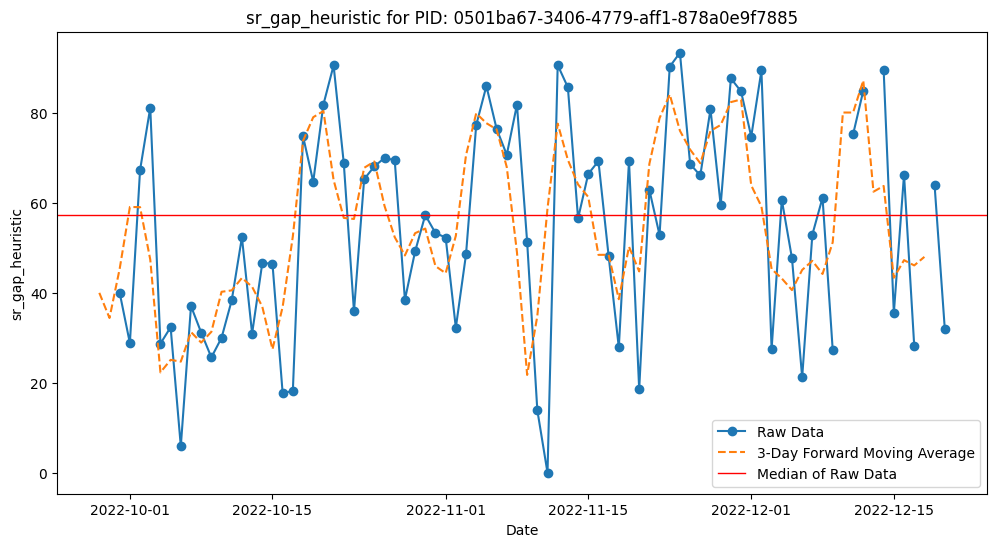

In [ ]:
# Visualize a couple subjects with both original and three day smoothed gap

# This is not the same as the target as it is the average of [current day, cd+1, cd+2]
# The target column created is the average of [cd+1, cd+2, cd+3]

# Selecting two PIDs
pids = df_good['PID'].unique()[:3]

# Filter the dataframe for the two PIDs
df_filtered = df_good[df_good['PID'].isin(pids)][['PID', 'trial_date', 'sr_gap_heuristic']]

# Ensure the trial_date is in datetime format
df_filtered['trial_date'] = pd.to_datetime(df_filtered['trial_date'])

# Sort by trial_date for each PID
df_filtered = df_filtered.sort_values(by=['PID', 'trial_date'])

# Apply the moving average calculation for each PID
df_filtered['sr_gap_heuristic_moving_avg'] = df_filtered.groupby('PID')['sr_gap_heuristic'].transform(lambda x: forward_moving_average(x, window=3))

# Plot the data for each PID
for pid in pids:
    df_pid = df_filtered[df_filtered['PID'] == pid]
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_pid['trial_date'], df_pid['sr_gap_heuristic'], label='Raw Data', marker='o')
    plt.plot(df_pid['trial_date'], df_pid['sr_gap_heuristic_moving_avg'].shift(1), label='3-Day Forward Moving Average', linestyle='--')
    
    # Add a horizontal line at the median of the raw data
    median_value = df_pid['sr_gap_heuristic'].median()
    plt.axhline(median_value, color='red', linestyle='-', linewidth=1, label='Median of Raw Data')
    
    plt.title(f'sr_gap_heuristic for PID: {pid}')
    plt.xlabel('Date')
    plt.ylabel('sr_gap_heuristic')
    plt.legend()
    plt.show()

## Simple Moving Average

## Exponential Moving Average

Theory behind choice for expondent?